https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading/#simple-example

In [23]:
# https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks
from tensorboard import notebook
notebook.list() # View open TensorBoard instances
# clear that folder to kill the instances C:\Users\clara\AppData\Local\Temp\.tensorboard-info

Known TensorBoard instances:
  - port 6006: logdir training_results/runs/train (started 20:20:28 ago; pid 21660)


In [26]:
%load_ext tensorboard
%tensorboard --logdir=training_results/runs/train

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...

In [27]:
notebook.display()

Selecting TensorBoard with logdir training_results/runs/train (started 20:21:16 ago; port 6006, pid 21660).


In [1]:
#def __get_chessboard_image():
#    cap = cv2.VideoCapture(1)
#    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 960)
#    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 540)
#    for _ in range(5):  # Capture and discard the first 5 frames
#        cap.read()
#
#    ret, frame = cap.read()
#    cap.release()
#    return frame

In [34]:
import cv2
import numpy as np

def __get_chessboard_image():
    cap = cv2.VideoCapture(1)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 960)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 540)
    for _ in range(5):  # Capture and discard the first 5 frames
        cap.read()

    ret, frame = cap.read()
    cap.release()

    # Get the original height and width of the captured frame
    height, width, _ = frame.shape

    # Calculate the scaling factor to make the width 640 pixels
    scale_factor = 640 / width

    # Resize the captured frame width to 640 pixels and calculate new height
    resized_frame = cv2.resize(frame, (640, int(height * scale_factor)))

    # Create a white frame with 640x640 dimensions
    white_frame = np.ones((640, 640, 3), dtype=np.uint8) * 255

    # Calculate the position to paste the resized frame in the center
    x_offset = (640 - resized_frame.shape[1]) // 2
    y_offset = (640 - resized_frame.shape[0]) // 2

    # Paste the resized frame onto the white frame
    white_frame[y_offset:y_offset + resized_frame.shape[0], x_offset:x_offset + resized_frame.shape[1]] = resized_frame

    return white_frame


In [51]:
import pyrealsense2 as rs
import numpy as np
import cv2
import sys

def __get_chessboard_image_rs():
    pipe = rs.pipeline()
    cfg = rs.config()
    
    cfg.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
    
    try:
        profile = pipe.start(cfg)
        # Get the sensor once at the beginning. (Sensor index: 1)
        sensor = pipe.get_active_profile().get_device().query_sensors()[1]
        # Set the exposure anytime during the operation
        sensor.set_option(rs.option.exposure, 1000.000)  #make image brighter
        
    except RuntimeError as e:
        print(f"Error starting the RealSense pipeline: {e}")
        sys.exit(1)
    
    color_image = None
    while True:
        frames = pipe.wait_for_frames()
        color_frame = frames.get_color_frame()
    
        if not color_frame:
            continue
    
        color_image = np.asanyarray(color_frame.get_data())
    
        break
        
    return color_image


In [63]:
from chessboardDetection import ChessboardDetection

# Call the function
detector = ChessboardDetection()
image = __get_chessboard_image_rs()
grid, image = detector.detect_chessboard(image)

{'a1': {'corner_a': (167.68073, 124.27456), 'corner_b': (210.32552, 123.22079), 'corner_c': (205.16876, 149.74425), 'corner_d': (160.31488, 150.53561)}, 'a2': {'corner_a': (210.32552, 123.22079), 'corner_b': (253.07812, 122.16777), 'corner_c': (250.10478, 148.95424), 'corner_d': (205.16876, 149.74425)}, 'a3': {'corner_a': (253.07812, 122.16777), 'corner_b': (291.54767, 121.22184), 'corner_c': (291.5475, 148.22742), 'corner_d': (250.10478, 148.95424)}, 'a4': {'corner_a': (291.54767, 121.22184), 'corner_b': (334.28387, 120.17601), 'corner_c': (336.31042, 147.44582), 'corner_d': (291.5475, 148.22742)}, 'a5': {'corner_a': (334.28387, 120.17601), 'corner_b': (375.30515, 119.17486), 'corner_c': (379.8272, 146.68842), 'corner_d': (336.31042, 147.44582)}, 'a6': {'corner_a': (375.30515, 119.17486), 'corner_b': (416.16812, 118.181114), 'corner_c': (423.6033, 145.92955), 'corner_d': (379.8272, 146.68842)}, 'a7': {'corner_a': (416.16812, 118.181114), 'corner_b': (459.56824, 117.128586), 'corner_c'

Using cache found in C:\Users\clara/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-9-2 Python-3.11.5 torch-2.1.0+cpu CPU

Fusing layers... 
YOLOv5m summary: 212 layers, 20897385 parameters, 0 gradients, 48.0 GFLOPs
Adding AutoShape... 


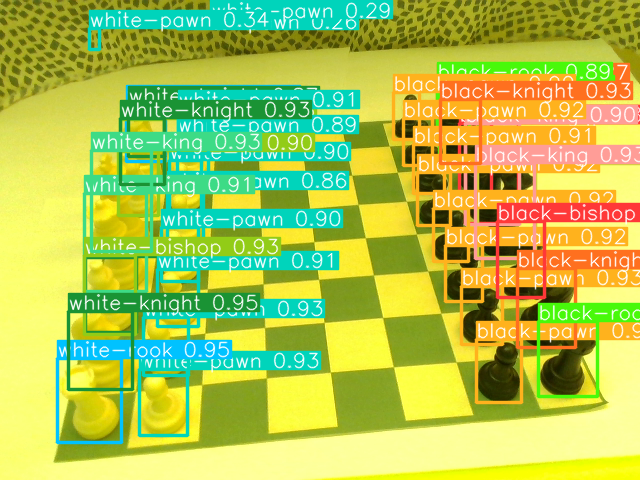

,xmin,ymin,xmax,ymax,confidence,class,name
0,68.740814,311.266907,132.960556,389.799133,0.950123,8,white-knight
1,538.285095,321.420105,597.746887,396.906860,0.949376,5,black-rook
2,57.481644,358.932709,121.469162,442.031891,0.948148,11,white-rook
3,497.512695,221.086105,544.555542,297.465576,0.943709,0,black-bishop
4,517.151184,268.157593,575.608337,347.003235,0.940862,2,black-knight
5,476.157227,339.690643,521.860962,402.470428,0.938163,3,black-pawn
6,91.708786,150.772415,151.778763,251.034164,0.934263,7,white-king
7,143.891052,317.292847,188.075836,375.959595,0.932955,9,white-pawn
8,84.867142,255.681000,135.964645,334.094696,0.931890,6,white-bishop
9,120.927513,118.111061,164.953705,184.656403,0.931585,8,white-knight


In [74]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'custom', path='training_results/runs/train/results_yolov5m/exp3/weights/best.pt')  # local model

#model.conf = 0.7  # NMS confidence threshold
#iou = 0.45  # NMS IoU threshold
#agnostic = False  # NMS class-agnostic
#multi_label = False  # NMS multiple labels per box
#classes = None  # (optional list) filter by class, i.e. = [0, 15, 16] for COCO persons, cats and dogs
#max_det = 1000  # maximum number of detections per image
#amp = False  # Automatic Mixed Precision (AMP) inference

#path_to_image = 'testimages/withFigures.jpg'
#image = cv2.imread(path_to_image)
image = __get_chessboard_image_rs()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Inference
#results = model(image)
results = model(image, augment=True)

results.show()

res = results.pandas().xyxy[0]
results.pandas().xyxy[0]


In [75]:
print(res.to_json(orient="records"))
data_json = res.to_json(orient="records")

[{"xmin":68.740814209,"ymin":311.2669067383,"xmax":132.9605560303,"ymax":389.7991333008,"confidence":0.9501228333,"class":8,"name":"white-knight"},{"xmin":538.2850952148,"ymin":321.4201049805,"xmax":597.746887207,"ymax":396.9068603516,"confidence":0.9493756294,"class":5,"name":"black-rook"},{"xmin":57.4816436768,"ymin":358.9327087402,"xmax":121.4691619873,"ymax":442.0318908691,"confidence":0.948148489,"class":11,"name":"white-rook"},{"xmin":497.5126953125,"ymin":221.0861053467,"xmax":544.5555419922,"ymax":297.4655761719,"confidence":0.9437091351,"class":0,"name":"black-bishop"},{"xmin":517.151184082,"ymin":268.1575927734,"xmax":575.6083374023,"ymax":347.0032348633,"confidence":0.9408620596,"class":2,"name":"black-knight"},{"xmin":476.1572265625,"ymin":339.6906433105,"xmax":521.8609619141,"ymax":402.4704284668,"confidence":0.9381625652,"class":3,"name":"black-pawn"},{"xmin":91.7087860107,"ymin":150.7724151611,"xmax":151.7787628174,"ymax":251.0341644287,"confidence":0.934262991,"class":7

# YOLOv8

In [73]:
from ultralytics import YOLO
import json

model = YOLO(f'training_results/runs/train/results_yolov8m/exp2/weights/best.pt')

# Run inference on an image
image = __get_chessboard_image()
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

results = model(image)
# Visualize the results on the frame
annotated_frame = results[0].plot()

# Display the annotated frame
cv2.imshow("YOLOv8 Inference", annotated_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

data_json = results[0].tojson()
print(data_json)

NameError: name '__get_chessboard_image' is not defined

In [77]:
import cv2
import json

# Parse the JSON data
data = json.loads(data_json)

# Initialize a list to store the resulting coordinates
chess_figures = []

# Iterate through each bounding box and calculate the point
for item in data:
    try: #YOLOv5 format
        xmin = item["xmin"]
        xmax = item["xmax"]
        ymin = item["ymin"]
        ymax = item["ymax"]
    except KeyError: #YOLOv8 format
        xmin = item["box"]["x1"]
        xmax = item["box"]["x2"]
        ymin = item["box"]["y1"]
        ymax = item["box"]["y2"]

    # Calculate the x and y coordinates of the point
    x_point = int((xmin + xmax) / 2)
    y_point = int(ymin + (3 * (ymax - ymin)) / 4)  # 1/4th from the bottom
    
    # Draw a point or circle on the image
    cv2.circle(image, (x_point, y_point), 5, (0, 0, 255), -1)  # Red circle with a radius of 5 pixels

    # Get class ID and name
    class_id = item["class"]
    class_name = item["name"]
    confidence = item["confidence"]

    # Append the resulting coordinates to the list
    chess_figures.append({
        "x_point": x_point,
        "y_point": y_point,
        "class_id": class_id,
        "class_name": class_name,
        "confidence:": confidence
    })

print(chess_figures)
# Display the image with points/circles
cv2.imshow("Image with Points", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[{'x_point': 100, 'y_point': 370, 'class_id': 8, 'class_name': 'white-knight', 'confidence:': 0.9501228333}, {'x_point': 568, 'y_point': 378, 'class_id': 5, 'class_name': 'black-rook', 'confidence:': 0.9493756294}, {'x_point': 89, 'y_point': 421, 'class_id': 11, 'class_name': 'white-rook', 'confidence:': 0.948148489}, {'x_point': 521, 'y_point': 278, 'class_id': 0, 'class_name': 'black-bishop', 'confidence:': 0.9437091351}, {'x_point': 546, 'y_point': 327, 'class_id': 2, 'class_name': 'black-knight', 'confidence:': 0.9408620596}, {'x_point': 499, 'y_point': 386, 'class_id': 3, 'class_name': 'black-pawn', 'confidence:': 0.9381625652}, {'x_point': 121, 'y_point': 225, 'class_id': 7, 'class_name': 'white-king', 'confidence:': 0.934262991}, {'x_point': 165, 'y_point': 361, 'class_id': 9, 'class_name': 'white-pawn', 'confidence:': 0.9329552054}, {'x_point': 110, 'y_point': 314, 'class_id': 6, 'class_name': 'white-bishop', 'confidence:': 0.9318904281}, {'x_point': 142, 'y_point': 168, 'class

In [78]:
def point_in_square(point, square):
    x, y = point['x_point'], point['y_point']
    corner_a_x, corner_a_y = square['corner_a']
    corner_b_x, corner_b_y = square['corner_b']
    corner_c_x, corner_c_y = square['corner_c']
    corner_d_x, corner_d_y = square['corner_d']

    if corner_a_x <= x <= corner_b_x and corner_a_y <= y <= corner_d_y:
        return True
    return False

points_in_squares = {square_name: [] for square_name in grid.keys()}

for point in chess_figures:
    for square_name, square_corners in grid.items():
        if point_in_square(point, square_corners):
            existing_points = points_in_squares[square_name]
            if not existing_points:
                # If no points exist in the square, add the current point
                points_in_squares[square_name].append(point)
            else:
                # Check if the current point has a higher confidence score
                max_confidence = max(existing_points, key=lambda p: p['confidence:'])
                if point['confidence:'] > max_confidence['confidence:']:
                    # Replace the existing point with the current point
                    points_in_squares[square_name].remove(max_confidence)
                    points_in_squares[square_name].append(point)

print(points_in_squares)

#for square_name, square_points in points_in_squares.items():
#    print(f'Points in square {square_name}: {len(square_points)}')
#    for point in square_points:
#        print(f' - {point}')

{'a1': [{'x_point': 193, 'y_point': 142, 'class_id': 9, 'class_name': 'white-pawn', 'confidence:': 0.906267345}], 'a2': [], 'a3': [], 'a4': [], 'a5': [], 'a6': [{'x_point': 406, 'y_point': 127, 'class_id': 3, 'class_name': 'black-pawn', 'confidence:': 0.9035176635}], 'a7': [{'x_point': 453, 'y_point': 122, 'class_id': 5, 'class_name': 'black-rook', 'confidence:': 0.8857855797}], 'a8': [], 'b1': [{'x_point': 192, 'y_point': 169, 'class_id': 9, 'class_name': 'white-pawn', 'confidence:': 0.8863225579}], 'b2': [], 'b3': [], 'b4': [], 'b5': [], 'b6': [{'x_point': 417, 'y_point': 153, 'class_id': 3, 'class_name': 'black-pawn', 'confidence:': 0.9171918631}], 'b7': [{'x_point': 460, 'y_point': 147, 'class_id': 2, 'class_name': 'black-knight', 'confidence:': 0.9285585284}], 'b8': [], 'c1': [{'x_point': 185, 'y_point': 197, 'class_id': 9, 'class_name': 'white-pawn', 'confidence:': 0.8959749937}], 'c2': [], 'c3': [], 'c4': [], 'c5': [], 'c6': [{'x_point': 428, 'y_point': 181, 'class_id': 3, 'clas

In [79]:
recognized_pieces = []

for square_name, points in points_in_squares.items():
    if points:
        max_confidence_point = max(points, key=lambda p: p['confidence:'])
        class_name = max_confidence_point['class_name']
        recognized_pieces.append({'square': square_name, 'class_name': class_name})

print(recognized_pieces)
for piece in recognized_pieces:
    print(piece)

[{'square': 'a1', 'class_name': 'white-pawn'}, {'square': 'a6', 'class_name': 'black-pawn'}, {'square': 'a7', 'class_name': 'black-rook'}, {'square': 'b1', 'class_name': 'white-pawn'}, {'square': 'b6', 'class_name': 'black-pawn'}, {'square': 'b7', 'class_name': 'black-knight'}, {'square': 'c1', 'class_name': 'white-pawn'}, {'square': 'c6', 'class_name': 'black-pawn'}, {'square': 'c7', 'class_name': 'black-bishop'}, {'square': 'c8', 'class_name': 'black-king'}, {'square': 'd1', 'class_name': 'white-pawn'}, {'square': 'd6', 'class_name': 'black-pawn'}, {'square': 'd8', 'class_name': 'black-king'}, {'square': 'e1', 'class_name': 'white-pawn'}, {'square': 'e7', 'class_name': 'black-pawn'}, {'square': 'f1', 'class_name': 'white-pawn'}, {'square': 'f7', 'class_name': 'black-pawn'}, {'square': 'f8', 'class_name': 'black-bishop'}, {'square': 'g1', 'class_name': 'white-pawn'}, {'square': 'g7', 'class_name': 'black-pawn'}, {'square': 'g8', 'class_name': 'black-knight'}, {'square': 'h2', 'class_n

[[' ', ' ', 'k', 'k', ' ', 'b', 'n', 'r'], ['r', 'n', 'b', ' ', 'p', 'p', 'p', 'p'], ['p', 'p', 'p', 'p', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], [' ', ' ', ' ', ' ', ' ', ' ', ' ', 'P'], ['P', 'P', 'P', 'P', 'P', 'P', 'P', ' ']] 

2kk1bnr/rnb1pppp/pppp4/8/8/8/7P/PPPPPPP1


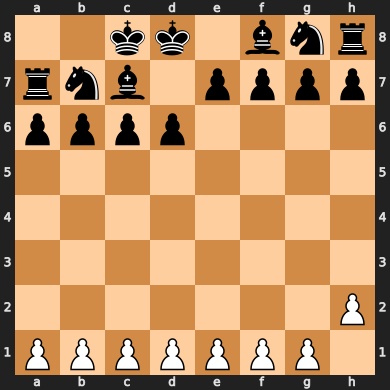

In [80]:
import chess
import chess.svg

# Initialize an empty 8x8 chessboard grid with spaces
chessboard = [[' ' for _ in range(8)] for _ in range(8)]

# Define a mapping of piece class names to FEN symbols
piece_mapping = {
    'white-king': 'K',
    'white-queen': 'Q',
    'white-rook': 'R',
    'white-bishop': 'B',
    'white-knight': 'N',
    'white-pawn': 'P',
    'black-king': 'k',
    'black-queen': 'q',
    'black-rook': 'r',
    'black-bishop': 'b',
    'black-knight': 'n',
    'black-pawn': 'p',
}

# Place the pieces on the chessboard grid
for piece in recognized_pieces:
    square = piece['square']
    class_name = piece['class_name']
    row = 8 - int(square[1])
    col = ord(square[0]) - ord('a')
    chessboard[row][col] = piece_mapping[class_name]

print(chessboard, '\n')

# Generate the FEN string
fen = '/'.join([''.join(row) for row in chessboard])
fen = fen.replace(' ' * 8, '8')  # Replace consecutive empty squares with their count
fen = fen.replace(' ' * 7, '7')
fen = fen.replace(' ' * 6, '6')
fen = fen.replace(' ' * 5, '5')
fen = fen.replace(' ' * 4, '4')
fen = fen.replace(' ' * 3, '3')
fen = fen.replace(' ' * 2, '2')
fen = fen.replace(' ' * 1, '1')

# Print the FEN string
print(fen)
board = chess.Board(fen=fen)

board